# CSC2611 Lab: Word embedding and semantic change
In this lab, you will explore the word embedding model word2vec and extend the analyses
in the earlier exercise to both synchronic and diachronic settings. Deliverable: Submit a
single PDF report (with your name on the first page) that addresses all the questions [15
points] and include link to the GitHub repository; the repository should include an executable
Python or Jupyter Notebook file that replicates all of the findings that you report in the
PDF write-up [5 points].

## 1 Synchronic word embedding [7 points]
Step 1. Download the pre-trained word2vec embeddings from https://code.google.com/archive/p/word2vec/, specifically, the file \GoogleNews-vectors-negative300.bin.gz".

---
Downloaded to folder `word2vec`.

Step 2. Using gensim, extract embeddings of words in Table 1 of RG65 that also appeared in
the set W from the earlier exercise, i.e., the pairs of words should be identical in all analyses.
An example use of gensim is provided below.

In [22]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from gensim.models import KeyedVectors
from tqdm import tqdm
from scipy.spatial.distance import cosine
from collections import defaultdict

In [2]:
model = KeyedVectors.load_word2vec_format('word2vec/GoogleNews-vectors-negative300.bin',
                                          binary=True)
model['dog']

C:\ProgramData\Anaconda3\envs\computational-models-semantic-change\lib\site-packages\smart_open\smart_open_lib.py:400: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  warnings.warn(


array([ 5.12695312e-02, -2.23388672e-02, -1.72851562e-01,  1.61132812e-01,
       -8.44726562e-02,  5.73730469e-02,  5.85937500e-02, -8.25195312e-02,
       -1.53808594e-02, -6.34765625e-02,  1.79687500e-01, -4.23828125e-01,
       -2.25830078e-02, -1.66015625e-01, -2.51464844e-02,  1.07421875e-01,
       -1.99218750e-01,  1.59179688e-01, -1.87500000e-01, -1.20117188e-01,
        1.55273438e-01, -9.91210938e-02,  1.42578125e-01, -1.64062500e-01,
       -8.93554688e-02,  2.00195312e-01, -1.49414062e-01,  3.20312500e-01,
        3.28125000e-01,  2.44140625e-02, -9.71679688e-02, -8.20312500e-02,
       -3.63769531e-02, -8.59375000e-02, -9.86328125e-02,  7.78198242e-03,
       -1.34277344e-02,  5.27343750e-02,  1.48437500e-01,  3.33984375e-01,
        1.66015625e-02, -2.12890625e-01, -1.50756836e-02,  5.24902344e-02,
       -1.07421875e-01, -8.88671875e-02,  2.49023438e-01, -7.03125000e-02,
       -1.59912109e-02,  7.56835938e-02, -7.03125000e-02,  1.19140625e-01,
        2.29492188e-01,  

In [3]:
rg65 = {("cord", "smile"): 0.02,
    ("rooster", "voyage"): 0.04,
    ("noon", "string"): 0.04,
    ("fruit", "furnace"): 0.05,
    ("autograph", "shore"): 0.06,
    ("automobile", "wizard"): 0.11,
    ("mound", "stove"): 0.14,
    ("grin", "implement"): 0.18,
    ("asylum", "fruit"): 0.19,
    ("asylum", "monk"): 0.39,
    ("graveyard", "madhouse"): 0.42,
    ("glass", "magician"): 0.44,
    ("boy", "rooster"): 0.44,
    ("cushion", "jewel"): 0.45,
    ("monk", "slave"): 0.57,
    ("asylum", "cemetery"): 0.79,
    ("coast", "forest"): 0.85,
    ("grin", "lad"): 0.88,
    ("shore", "woodland"): 0.90,
    ("monk", "oracle"): 0.91,
    ("boy", "sage"): 0.96,
    ("automobile", "cushion"): 0.97,
    ("mound", "shore"): 0.97,
    ("lad", "wizard"): 0.99,
    ("forest", "graveyard"): 1.00,
    ("food", "rooster"): 1.09,
    ("cemetery", "woodland"): 1.18,
    ("shore", "voyage"): 1.22,
    ("bird", "woodland"): 1.24,
    ("coast", "hill"): 1.26,
    ("furnace", "implement"): 1.37,
    ("crane", "rooster"): 1.41,
    ("hill", "woodland"): 1.48,
    ("car", "journey"): 1.55,
    ("cemetery", "mound"): 1.69,
    ("glass", "jewel"): 1.78,
    ("magician", "oracle"): 1.82,
    ("crane", "implement"): 2.37,
    ("brother", "lad"): 2.41,
    ("sage", "wizard"): 2.46,
    ("oracle", "sage"): 2.61,
    ("bird", "crane"): 2.63,
    ("bird", "cock"): 2.63,
    ("food", "fruit"): 2.69,
    ("brother", "monk"): 2.74,
    ("asylum", "madhouse"): 3.04,
    ("furnace", "stove"): 3.11,
    ("magician", "wizard"): 3.21,
    ("hill", "mound"): 3.29,
    ("cord", "string"): 3.41,
    ("glass", "tumbler"): 3.45,
    ("grin", "smile"): 3.46,
    ("serf", "slave"): 3.46,
    ("journey", "voyage"): 3.58,
    ("autograph", "signature"): 3.59,
    ("coast", "shore"): 3.60,
    ("forest", "woodland"): 3.65,
    ("implement", "tool"): 3.66,
    ("cock", "rooster"): 3.68,
    ("boy", "lad"): 3.82,
    ("cushion", "pillow"): 3.84,
    ("cemetery", "graveyard"): 3.88,
    ("automobile", "car"): 3.92,
    ("midday", "noon"): 3.94,
    ("gem", "jewel"): 3.94}

In [4]:
human_similarities = list(rg65.values())

len(human_similarities)

65

Step 3. Calculate cosine distance between each pair of word embeddings you have extracted,
and report the Pearson correlation between word2vec-based and human similarities. [1 point]
Comment on this value in comparison to those from LSA and word-context vectors from analyses in the earlier exercise. [1 point]

In [5]:
cosine_similarities = []
for (w1,w2) in rg65:
    cosine_similarity = model.similarity(w1, w2)
    print(w1, w2, cosine_similarity)
    cosine_similarities.append(cosine_similarity)

cord smile 0.018116442126818386
rooster voyage 0.06275809503788346
noon string 0.02165451453599644
fruit furnace 0.07321497303845252
autograph shore 0.03465591620079347
automobile wizard -0.028087421797821494
mound stove 0.24527245658207075
grin implement -0.00023054715138643247
asylum fruit 0.05780962502651894
asylum monk 0.1386682416620416
graveyard madhouse 0.29396817045820234
glass magician 0.0372249103808921
boy rooster 0.2848518997190718
cushion jewel 0.12478441292362313
monk slave 0.1914622712098282
asylum cemetery 0.09243521370466695
coast forest 0.23609790007924336
grin lad 0.2480188694136008
shore woodland 0.11690946166507767
monk oracle 0.30354036186223615
boy sage 0.16595692925794386
automobile cushion 0.1335858479255398
mound shore 0.1316413078928056
lad wizard 0.33023006071411026
forest graveyard 0.22901121328397622
food rooster 0.11830646680620913
cemetery woodland 0.38192504756515
shore voyage 0.20434848891292634
bird woodland 0.34024251696802266
coast hill 0.1611577547

In [6]:
pearsonr(cosine_similarities, human_similarities)

(0.7720616150731001, 5.0910642245117706e-14)

Step 4. Perform the analogy test based on data [here](http://www.fit.vutbr.cz/~imikolov/rnnlm/word-test.v1.txt) (or as provided) with the pre-trained
word2vec embeddings. Report the accuracy on the semantic analogy test and the syntactic
analogy test (see Note below). [2 points]
Repeat the analysis with LSA vectors (300 dimensions) from the earlier exercise, and comment on
the results in comparison to those from word2vec. [1 point] Note: It is expected that the number
of entries you could test with LSA would be smaller than that based on word2vec. For a fair comparison, you should consider
reporting model accuracies based on the small test set, for both word2vec and LSA.

In [7]:
with open('exercise.pickle', 'rb') as handle:
    exercise = pickle.load(handle)

In [8]:
M2_300 = exercise["M2_300"]
W_indices = exercise["W_indices"]
W_words = exercise["W_words"]
LSA_words = set(W_indices.keys())

In [9]:
len(W_words)

5030

In [10]:
semantic_analogies = []
syntactic_analogies = []

is_semantic = True
with open("word-test.v1.txt", encoding="utf8") as f:
    f.readline()
    f.readline()
    for line in f:
        line = line.strip().split()
        
        if line[0] == ":":
            if line[1] == "gram1-adjective-to-adverb":
                is_semantic = False
            continue
        if line[0] in LSA_words and line[1] in LSA_words and line[2] in LSA_words and line[3] in LSA_words:
            if is_semantic:
                semantic_analogies.append(line)
            else:
                syntactic_analogies.append(line)

print(len(semantic_analogies), len(syntactic_analogies))

90 2024


In [11]:
correct = 0
for words in tqdm(semantic_analogies):
    
    closest = model.most_similar(positive=[model[words[1]], model[words[2]]],
                                 negative=[model[words[0]]],
                                 topn=1)[0][0]
    if words[3] == closest:
        correct += 1
print("Semantic analogies task accuracy for the test set is", correct / len(semantic_analogies))

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [00:47<00:00,  1.88it/s]

Semantic analogies task accuracy for the test set is 0.6222222222222222


In [12]:
correct = 0
for words in tqdm(syntactic_analogies):
    closest = model.most_similar(positive=[model[words[1]], model[words[2]]],
                                 negative=[model[words[0]]],
                                 topn=2)[1][0]
    if words[3] == closest:
        correct += 1
    
print("Syntactic analogies task accuracy for the test set is", correct / len(syntactic_analogies))

100%|██████████████████████████████████████████████████████████████████████████████| 2024/2024 [08:48<00:00,  3.83it/s]

Syntactic analogies task accuracy for the test set is 0.5192687747035574


In [13]:
# a is to b as c is to d -> d = b - a + c
words = ["computer", "computers", "cow", "cows"]
#model.most_similar(positive=[words[1], words[2]], negative=[words[0]])
#model.most_similar([model[words[1]] - model[words[0]]+ model[words[2]]])
model.most_similar(positive=[model[words[1]], model[words[2]]],
                                 negative=[model[words[0]]],
                                 topn=5)

[('cow', 0.8597310781478882),
 ('cows', 0.7599222660064697),
 ('bovines', 0.6210439205169678),
 ('goats', 0.6007076501846313),
 ('cattle', 0.5907984972000122)]

## LSA analysis

In [14]:
def find_closest(model, vector, topk=1):
    res = []
    for i in range(len(model)): #cycle over all of the words in the model
        comparable_vector = model[i]

        dist = cosine(vector, comparable_vector)
        res.append((W_words[i], dist))
    return sorted(res, key=lambda x: x[1])[:topk]

In [15]:
W_words

{0: 'exchange',
 1: 'knee',
 2: 'horn',
 3: 'literary',
 4: 'miss',
 5: 'uniform',
 6: 'least',
 7: 'employee',
 8: 'decisions',
 9: 'cavalry',
 10: 'handled',
 11: 'scope',
 12: 'apart',
 13: 'champion',
 14: 'argue',
 15: 'contacts',
 16: 'rang',
 17: 'eleven',
 18: 'tuesday',
 19: 'madhouse',
 20: 'exist',
 21: 'surprised',
 22: 'over',
 23: 'clubs',
 24: 'themselves',
 25: 'chose',
 26: 'two',
 27: 'british',
 28: 'regional',
 29: 'psychological',
 30: 'fascinating',
 31: 'calculated',
 32: 'lack',
 33: 'wiped',
 34: 'single',
 35: 'those',
 36: 'brother',
 37: 'sought',
 38: 'suits',
 39: 'chapel',
 40: 'kinds',
 41: 'spoke',
 42: 'fresh',
 43: 'pull',
 44: 'mature',
 45: 'harry',
 46: 'author',
 47: 'older',
 48: 'collection',
 49: 'normal',
 50: 'anniversary',
 51: 'picked',
 52: 'about',
 53: 'wants',
 54: 'song',
 55: 'vigorous',
 56: 'conditions',
 57: 'usually',
 58: 'artery',
 59: 'agency',
 60: 'intellectual',
 61: 'colleagues',
 62: 'cleared',
 63: 'far',
 64: 'itself',
 

In [16]:
#LSA - M2_300
correct = 0
for words in tqdm(semantic_analogies):
    triangle_vector = M2_300[W_indices[words[1]]] - M2_300[W_indices[words[0]]] + M2_300[W_indices[words[2]]]
    closest = find_closest(M2_300, triangle_vector)
    #print(closest[0])
    if words[3] == closest[0][0]:
        correct += 1
print("Semantic analogies task accuracy for the test set is", correct / len(semantic_analogies))

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [00:20<00:00,  4.42it/s]

Semantic analogies task accuracy for the test set is 0.011111111111111112


In [17]:
#LSA - M2_300
correct = 0
for words in tqdm(syntactic_analogies):
    triangle_vector = M2_300[W_indices[words[1]]] - M2_300[W_indices[words[0]]] + M2_300[W_indices[words[2]]]
    closest = find_closest(M2_300, triangle_vector)
    if words[3] == closest[0][0]:
        correct += 1
print("Syntactic analogies task accuracy for the test set is", correct / len(syntactic_analogies))

100%|██████████████████████████████████████████████████████████████████████████████| 2024/2024 [08:19<00:00,  4.05it/s]

Syntactic analogies task accuracy for the test set is 0.0


Step 5. Suggest a way to improve the existing set of vector-based models in capturing word
similarities in general, and provide justifications for your suggestion. [2 points]

---
Explained in the PDF.

# 2 Diachronic word embedding [8 points]

Step 1. Download the diachronic word2vec embeddings from the course syllabus page. These
embeddings capture historical usage of a small subset of English words over the past century.

---
The file data.pkl uses a subset of data from https://nlp.stanford.edu/projects/histwords/
The file is a dictionary that contains the following entries:
'w': a list of 2000 words, a subset of the English lexicon
'd': a list of decades between 1900 and 2000
'E': a 2000 by 10 by 300 list of list of vectors; the (i,j)-th entry is a 300-dimensional vector for the i-th word in the j-th decade

Reference:
Hamilton, W. L., Leskovec, J., & Jurafsky, D. (2016). Diachronic word embeddings reveal statistical laws of semantic change. In Proceedings of the 54th annual meeting of the association for computational linguistics (volume 1:Long papers)(pp. 1489–1501).

---



In [18]:
with open('embeddings/embeddings/data.pkl', 'rb') as f:
    d = pickle.load(f)

In [19]:
words = d["w"] #['time', 'man', 'years', 'part', 'way', 'life', 'people',...]
words

['time',
 'man',
 'years',
 'part',
 'way',
 'life',
 'people',
 'work',
 'world',
 'states',
 'state',
 'day',
 'united',
 'men',
 'number',
 'case',
 'fact',
 'use',
 'york',
 'place',
 'end',
 'year',
 'war',
 'government',
 'order',
 'law',
 'point',
 'country',
 'hand',
 'god',
 'course',
 'power',
 'house',
 'water',
 'system',
 'form',
 'side',
 'act',
 'children',
 'history',
 'university',
 'century',
 'things',
 'nature',
 'question',
 'means',
 'matter',
 'period',
 'court',
 'mind',
 'nothing',
 'days',
 'development',
 'value',
 'school',
 'cent',
 'view',
 'city',
 'interest',
 'subject',
 'example',
 'body',
 'person',
 'book',
 'study',
 'company',
 'times',
 'name',
 'effect',
 'head',
 'thing',
 'result',
 'land',
 'cases',
 'reason',
 'women',
 'church',
 'members',
 'age',
 'sense',
 'amount',
 'society',
 'others',
 'death',
 'something',
 'home',
 'position',
 'light',
 'education',
 'words',
 'change',
 'room',
 'line',
 'london',
 'father',
 'money',
 'child',
 

In [20]:
decades = d["d"] # [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]
decades

[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]

In [23]:
vectors = np.asarray(d["E"])
vectors.shape

(2000, 10, 300)

**Step 2.** Propose three different methods for measuring degree of semantic change for individual
words and report the top 20 most and least changing words in table(s) from each
measure. Measure the intercorrelations (of semantic change in all words, given the embeddings
from Step 1) among the three methods you have proposed and summarize the Pearson correlations in a 3-by-3 table. [3 points]

**Method 1**

In [24]:
res = []

for i in range(len(vectors)):

    word = words[i]
    vector_first = vectors[i][0]
    vector_last = vectors[i][-1]
    dist = cosine(vector_first, vector_last)
    res.append((word, round(dist, 2)))

C:\ProgramData\Anaconda3\envs\computational-models-semantic-change\lib\site-packages\scipy\spatial\distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [25]:
method1 = sorted(res, key=lambda x: -x[1])

print("Top-20 most changed words", method1[:20])
print("Top-20 least changed words", method1[-20:])

Top-20 most changed words [('programs', 0.99), ('objectives', 0.98), ('computer', 0.96), ('radio', 0.91), ('sector', 0.9), ('goals', 0.85), ('approach', 0.84), ('van', 0.84), ('shri', 0.82), ('media', 0.81), ('impact', 0.8), ('perspective', 0.79), ('film', 0.78), ('patterns', 0.78), ('shift', 0.78), ('berkeley', 0.78), ('assessment', 0.77), ('stanford', 0.77), ('challenge', 0.77), ('therapy', 0.76)]
Top-20 least changed words [('week', 0.32), ('september', 0.32), ('evening', 0.32), ('payment', 0.32), ('century', 0.31), ('months', 0.31), ('december', 0.31), ('daughter', 0.31), ('increase', 0.3), ('january', 0.3), ('october', 0.3), ('years', 0.29), ('february', 0.29), ('november', 0.28), ('june', 0.26), ('april', 0.24), ('techniques', 0), ('skills', 0), ('mcgraw', 0), ('ml', 0)]


In [26]:
for pair in reversed(method1[-20:]):
    print(pair[0], pair[1])

ml 0
mcgraw 0
skills 0
techniques 0
april 0.24
june 0.26
november 0.28
february 0.29
years 0.29
october 0.3
january 0.3
increase 0.3
daughter 0.31
december 0.31
months 0.31
century 0.31
payment 0.32
evening 0.32
september 0.32
week 0.32


**Method 2**

In [27]:
# Method 2: Summing the cosine distances over two periods next to each other
res = defaultdict(float)

for i in range(len(vectors)):

    word = words[i]
    
    for j in range(len(vectors[i])-1):
        
        vector_j = vectors[i][j] # i-th word's j-th period
        vector_j_next = vectors[i][j+1] # i-th word's j+1-th period
        dist = cosine(vector_j, vector_j_next)
        res[word] += dist

In [28]:
res.items()

dict_items([('time', 3.11154742481783), ('man', 2.6626050136203228), ('years', 1.7849342893058475), ('part', 2.5889090805512303), ('way', 2.917707907432548), ('life', 2.2449829247690327), ('people', 2.498926705147569), ('work', 2.622305990687181), ('world', 2.3520703155563334), ('states', 2.200310854388313), ('state', 2.3457801249215087), ('day', 2.413456962878216), ('united', 2.186141927480587), ('men', 2.33286882142931), ('number', 2.1850149075238567), ('case', 2.8848262300266354), ('fact', 2.843562318213151), ('use', 2.558312570938379), ('york', 1.7320553926604958), ('place', 2.6908894249379105), ('end', 2.423479376270587), ('year', 1.9144814892169881), ('war', 1.8889774078175592), ('government', 2.0855051945658443), ('order', 2.706148907706443), ('law', 1.9850359184958213), ('point', 2.374204691650311), ('country', 2.367402509958797), ('hand', 2.3769227785909894), ('god', 1.7344566819685259), ('course', 2.9115043933748517), ('power', 2.135364142171988), ('house', 2.1692431928708675

In [29]:
method2 = sorted(res.items(), key=lambda kv: kv[1])

print("Top-20 most changed words", method2[-20:])
print("Top-20 least changed words", method2[:20])

Top-20 most changed words [('maryland', 3.167558572259411), ('stanford', 3.206763732608461), ('publications', 3.211151740291032), ('j', 3.3670049494877636), ('evaluation', 3.3726983039868497), ('philip', 3.378519609496079), ('haven', 3.3790111519685744), ('goals', 3.413885057854268), ('johnson', 3.4187034121571127), ('therapy', 3.4223694098427324), ('adams', 3.4973607025064517), ('wilson', 3.5022473108419163), ('princeton', 3.577544668393497), ('martin', 3.5901159173173682), ('baltimore', 3.595332808529988), ('wiley', 3.616288939705456), ('berkeley', 3.6218319684336375), ('sector', 3.673238026743817), ('jones', 3.7939133720696043), ('harper', 3.7967777760857278)]
Top-20 least changed words [('shri', 1.1145082639096062), ('april', 1.3068273807582544), ('miles', 1.3664508627260314), ('november', 1.3920387952065156), ('september', 1.4011936971671708), ('january', 1.4337069400894205), ('december', 1.4373113306761787), ('february', 1.5034024486995519), ('university', 1.5176731821382132), ('

In [30]:
for pair in (method2[:20]):
    print(pair[0], round(pair[1], 2))

shri 1.11
april 1.31
miles 1.37
november 1.39
september 1.4
january 1.43
december 1.44
february 1.5
university 1.52
vessels 1.52
trees 1.52
cent 1.54
solution 1.55
july 1.55
decrease 1.56
october 1.56
temperature 1.57
buildings 1.6
june 1.61
patients 1.61


**Method 3**

In [31]:
# Method 3: Finding the nearest words (using cosine distance) for all of the timeperiods and finding for which words the change is most significant
distances = defaultdict(float) #top-down dynamic programming
def find_nearest_neighbours(word, vector, period_ind, topk=10):
    """Finds top-k nearest neighbour words for a given word, its vector and time period index."""
    res = []
    for i in range(len(vectors)):
        comparable_word = words[i]
        if comparable_word == word: #don't calculate word distance with itself
            continue
        comparable_vector = vectors[i][period_ind]
        if (word, comparable_word, period_ind) in distances:
            dist = distances[(word, comparable_word, period_ind)]
        elif (comparable_word, word, period_ind) in distances:
            dist = distances[(comparable_word, word, period_ind)]
        else:
            dist = cosine(vector, comparable_vector)
            distances[(word, comparable_word, period_ind)] = dist
        res.append((comparable_word, dist))
    return sorted(res, key=lambda x: x[1])[:topk]

def count_common_neighbours(n1, n2):
    return len(list(set([pair[0] for pair in n1]).intersection([pair[0] for pair in n2])))
        
res = defaultdict(int)

for i in tqdm(range(len(vectors))): #loop over all words

    word = words[i] #get the currently observed word
    
    for j in range(len(vectors[i])-1): #loop over all time periods
        
        vector_j = vectors[i][j] # i-th word's j-th period
        nearest_neighbours = find_nearest_neighbours(word, vector_j, j)
        nearest_neighbours_next = find_nearest_neighbours(word, vector_j, j+1)
        common_count = count_common_neighbours(nearest_neighbours, nearest_neighbours_next)
        res[word] += common_count

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [18:56<00:00,  1.76it/s]


In [32]:
method3 = sorted(res.items(), key=lambda kv: kv[1])

print("Top-20 most changed words", method3[:20])
print("Top-20 least changed words", method3[-20:])

Top-20 most changed words [('shri', 28), ('separation', 31), ('scale', 32), ('representation', 32), ('washington', 33), ('chamber', 34), ('base', 35), ('work', 36), ('origin', 36), ('operations', 36), ('determination', 36), ('mark', 36), ('state', 37), ('ring', 37), ('virtue', 38), ('club', 38), ('lack', 39), ('preparation', 39), ('bar', 39), ('dream', 39)]
Top-20 least changed words [('waters', 77), ('thickness', 77), ('metals', 77), ('father', 78), ('anything', 78), ('william', 78), ('uncle', 78), ('march', 79), ('sister', 79), ('g', 79), ('june', 80), ('july', 80), ('january', 80), ('october', 80), ('april', 81), ('december', 81), ('august', 81), ('september', 81), ('november', 81), ('february', 81)]


In [33]:
method3_max = max(res.values())
method3_max

81

In [34]:
method3_normalized = [(w, 81-v) for (w,v) in method3]

In [35]:
for pair in reversed(method3[-20:]):
    print(pair[0], round(pair[1], 2))

february 81
november 81
september 81
august 81
december 81
april 81
october 80
january 80
july 80
june 80
g 79
sister 79
march 79
uncle 78
william 78
anything 78
father 78
metals 77
thickness 77
waters 77


In [36]:
method3 = method3_normalized

In [37]:
print(pearsonr([p[1] for p in sorted(method1)], [p[1] for p in sorted(method1)]))
print(pearsonr([p[1] for p in sorted(method1)], [p[1] for p in sorted(method2)]))
print(pearsonr([p[1] for p in sorted(method1)], [p[1] for p in sorted(method3)]))
print(pearsonr([p[1] for p in sorted(method2)], [p[1] for p in sorted(method1)]))
print(pearsonr([p[1] for p in sorted(method2)], [p[1] for p in sorted(method2)]))
print(pearsonr([p[1] for p in sorted(method2)], [p[1] for p in sorted(method3)]))
print(pearsonr([p[1] for p in sorted(method3)], [p[1] for p in sorted(method1)]))
print(pearsonr([p[1] for p in sorted(method3)], [p[1] for p in sorted(method2)]))
print(pearsonr([p[1] for p in sorted(method3)], [p[1] for p in sorted(method3)]))

(1.0, 0.0)
(0.6403200235241429, 3.3027955055925653e-231)
(0.3493594836539953, 1.706350130505501e-58)
(0.6403200235241429, 3.3027955055925653e-231)
(0.9999999999999998, 0.0)
(0.2566727853478315, 1.86647940899868e-31)
(0.3493594836539953, 1.706350130505501e-58)
(0.2566727853478315, 1.86647940899868e-31)
(0.9999999999999997, 0.0)


Step 3. Propose and justify a procedure for evaluating the accuracy of the methods you have
proposed in Step 2, and then evaluate the three methods following this proposed procedure
and report Pearson correlations or relevant test statistics. [2 points]


In [38]:
# overlap between the 100 closest words in 1900 and 1990.

ground_truth = defaultdict(int)

res = {}

for i in tqdm(range(len(vectors))): #loop over all words

    word = words[i] #get the currently observed word
       
    vector_first = vectors[i][0] # i-th word's j-th period
    vector_last = vectors[i][-1]
    nearest_neighbours = find_nearest_neighbours(word, vector_first, 0)
    nearest_neighbours_next = find_nearest_neighbours(word, vector_last, -1)
    common_count = count_common_neighbours(nearest_neighbours, nearest_neighbours_next)
    res[word] = common_count

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:52<00:00, 17.74it/s]


In [39]:
maximal = max(res.values())

maximal

7

In [40]:
ground_truth = sorted(res.items(), key=lambda kv: kv[0])

ground_truth = [maximal - p[1] for p in ground_truth]

In [41]:
ground_truth

[2,
 4,
 6,
 4,
 3,
 5,
 3,
 3,
 2,
 3,
 3,
 2,
 5,
 2,
 3,
 2,
 4,
 3,
 4,
 4,
 4,
 6,
 4,
 3,
 5,
 4,
 7,
 4,
 6,
 5,
 3,
 6,
 2,
 3,
 1,
 5,
 6,
 3,
 1,
 1,
 3,
 4,
 6,
 2,
 4,
 2,
 2,
 3,
 3,
 4,
 4,
 6,
 1,
 2,
 3,
 2,
 3,
 4,
 2,
 3,
 5,
 1,
 3,
 3,
 2,
 4,
 1,
 2,
 4,
 5,
 1,
 1,
 5,
 2,
 3,
 6,
 4,
 1,
 4,
 3,
 4,
 7,
 5,
 1,
 2,
 5,
 3,
 2,
 4,
 1,
 1,
 1,
 2,
 4,
 4,
 3,
 2,
 3,
 3,
 4,
 3,
 2,
 4,
 5,
 4,
 1,
 7,
 3,
 2,
 3,
 4,
 2,
 4,
 2,
 2,
 2,
 1,
 5,
 2,
 3,
 3,
 5,
 5,
 3,
 4,
 1,
 1,
 2,
 2,
 1,
 3,
 1,
 3,
 4,
 2,
 2,
 2,
 3,
 1,
 3,
 4,
 1,
 6,
 2,
 4,
 6,
 6,
 7,
 2,
 2,
 1,
 4,
 3,
 2,
 3,
 5,
 6,
 5,
 2,
 4,
 4,
 3,
 3,
 4,
 4,
 3,
 5,
 4,
 2,
 1,
 2,
 4,
 4,
 6,
 2,
 4,
 2,
 3,
 5,
 3,
 6,
 4,
 3,
 2,
 3,
 6,
 4,
 2,
 3,
 4,
 6,
 7,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 5,
 5,
 3,
 2,
 1,
 2,
 2,
 4,
 5,
 3,
 6,
 4,
 4,
 4,
 5,
 1,
 2,
 4,
 4,
 2,
 5,
 2,
 2,
 4,
 3,
 1,
 4,
 3,
 2,
 2,
 5,
 3,
 6,
 6,
 6,
 3,
 4,
 3,
 2,
 4,
 5,
 1,
 4,
 4,
 2,
 3,
 3,
 3,
 4,
 6,
 6,


In [42]:
print(pearsonr([p[1] for p in sorted(method1)], ground_truth))
print(pearsonr([p[1] for p in sorted(method2)], ground_truth))
print(pearsonr([p[1] for p in sorted(method3)], ground_truth))

(0.3709492535224028, 2.8332015019630937e-66)
(0.1740054264525588, 4.623598068982051e-15)
(0.6265142083216051, 1.594909000923489e-218)


Step 4. Extract the top 3 changing words using the best method from Steps 2 and 3. Propose
and implement a simple way of detecting the point(s) of semantic change in each word based
on its diachronic embedding time course - visualize the time course and the detected change
point(s). [3 points]

In [43]:
def get_distances(input_word):
    res = []

    for i in range(len(vectors)):

        word = words[i]
        if word == input_word:
            for j in range(len(vectors[i])-1):
                vector = vectors[i][j]
                vector_next = vectors[i][j+1]
                dist = cosine(vector, vector_next)
                res.append(dist)
    return res

In [44]:
decade_labels = [str(decades[i]) + "-" + str(decades[i+1]) for i in range(len(decades)-1)]

decade_labels

['1900-1910',
 '1910-1920',
 '1920-1930',
 '1930-1940',
 '1940-1950',
 '1950-1960',
 '1960-1970',
 '1970-1980',
 '1980-1990']

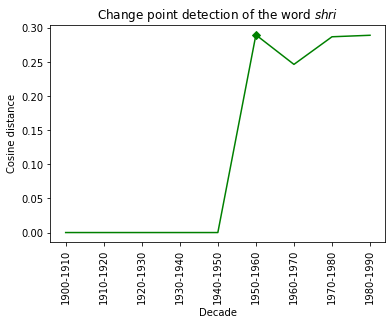

In [45]:
def plot_changepoint(res, word):
    plt.plot(res, '-gD', markevery=[res.index(max(res))])
    plt.xticks(range(9), decade_labels, rotation="vertical")
    plt.title(f"Change point detection of the word ${word}$")
    plt.xlabel("Decade")
    plt.ylabel('Cosine distance')
    plt.savefig(f"{word}.pdf", bbox_inches='tight')
    plt.show()
    
word = "shri"
plot_changepoint(get_distances(word), word)

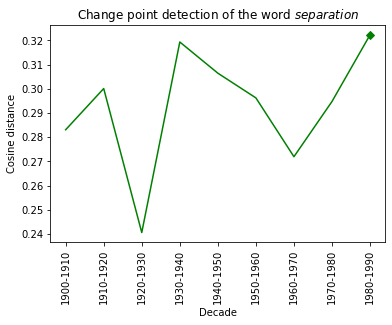

In [46]:
word = "separation"
plot_changepoint(get_distances(word), word)

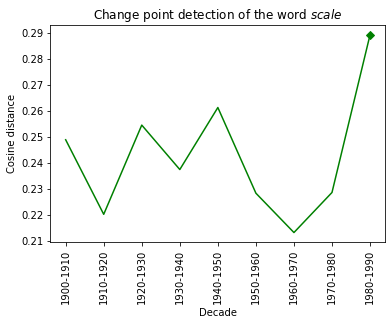

In [47]:
word = "scale"
plot_changepoint(get_distances(word), word)